In [7]:
import sys
# import hcp_utils as hcp
import sys
from scipy.io import loadmat
import numpy as np
import matplotlib
import glob
from matplotlib import pyplot as plt
import numpy as np

In [8]:
def fdr_correction(p_values):
    # Sort the p-values in ascending order
    sorted_p_indices = np.argsort(p_values)
    sorted_p_values = np.sort(p_values)
    
    # Calculate the corrected p-values
    m = len(p_values)
    ranks = np.arange(1, m + 1)
    corrected_p_values = sorted_p_values * m / ranks
    
    # Ensure the corrected p-values are between 0 and 1
    corrected_p_values = np.minimum.accumulate(corrected_p_values[::-1])[::-1]
    
    # Return the corrected p-values in their original order
    unsorted_corrected_p_values = np.empty_like(corrected_p_values)
    unsorted_corrected_p_values[sorted_p_indices] = corrected_p_values
    
    return unsorted_corrected_p_values

In [9]:
#with open('thresholded_pilots_ru_dm_list.txt', 'r') as file:
with open('pilots_ru_dm_list.txt', 'r') as file:
    sub_list = file.readlines()
good_subjects_list = [line.strip() for line in sub_list]

In [11]:
percent_sig=[]
mean_r2=[]
for sub in good_subjects_list:
    loaded=np.load(f'../good_pilots_new/sub-{sub}_roi-a4a5_feat-concatspeech_delay-0_ridgecv.npz')
    sub_data=loaded['stacked_r2s']
    mean_r2.append(np.mean(loaded['stacked_r2s']))
    bootstrap_files = glob.glob(f'../good_pilots_new/sub-{sub}_roi-a4a5_feat-concatspeech_delay-0_ridgecv_bootstrap-*.npz')
    bootstrap_data=[]
    for f in bootstrap_files:
        data=np.load(f)
        bootstrap_data.append(data['stacked_r2s'])
    bootstrap_data=np.asanyarray(bootstrap_data)
    
    p_vals=[]
    for i,sub_d in enumerate(sub_data):
        bool_arr=bootstrap_data[:,i]>sub_d
        count = np.sum(bool_arr)
        p_vals.append(count/bootstrap_data.shape[0])
    
    #bh_corrected=false_discovery_control(p_vals, method='bh')
    #sub_data[bh_corrected > 0.05] = 0
    bh_corrected = fdr_correction(p_vals)
    count_p=len([x for x in p_vals if x <= 0.05])
    count = len([x for x in bh_corrected if x <= 0.05])
    #print(len(bootstrap_files),count_p,count)
    percent_sig.append(count/len(p_vals))

In [12]:
mean_r2

[0.03790475020251245,
 0.10267705514635325,
 0.0070668299122307,
 0.11665525280527016,
 0.08079437560885401,
 -0.0017207859487904558,
 0.02458723065813182,
 0.07108583898477405,
 0.04304291031485368,
 0.05341047554159523,
 0.009352124143785164,
 0.0727821857401982,
 0.0693899694490322,
 0.03924361083033583,
 0.13219002272725125,
 0.0025466552634187405,
 0.08077943728278544,
 0.08677626393014694,
 0.06722774621238606,
 0.06692482489740828,
 0.03187806918054494,
 0.0257454317273379,
 0.06312141688217524,
 0.08120941512016656,
 0.15155115303924363,
 0.11204800977791042]

### plot r2 vs bootstrap percent of significant voxels

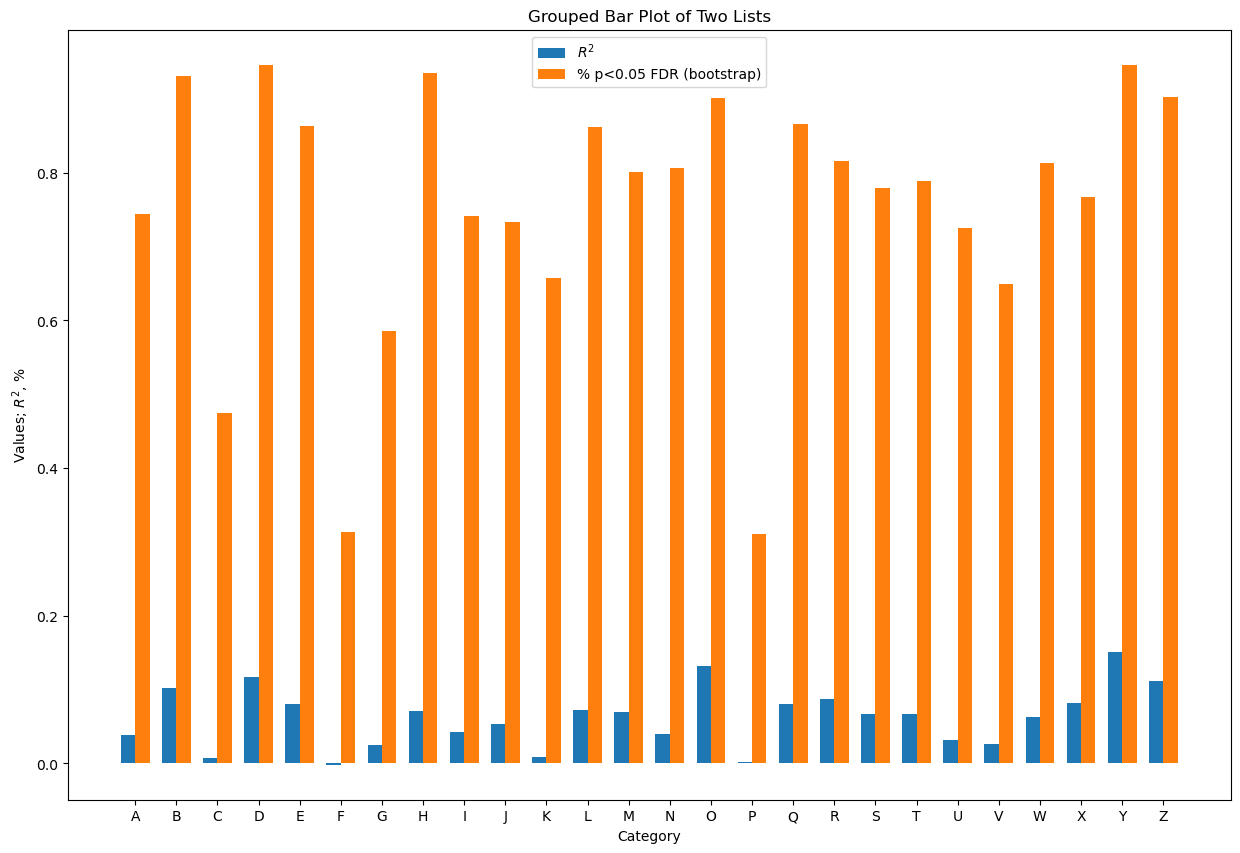

In [17]:
percent_sig

N = len(mean_r2)

# Position of bars on x-axis
ind = np.arange(N)

# Width of bars
width = 0.35

# Plotting the bars

fig, ax = plt.subplots(figsize=(15, 10))
bar1 = ax.bar(ind, mean_r2, width, label='$R^2$')
bar2 = ax.bar(ind + width, percent_sig, width, label='% p<0.05 FDR (bootstrap)')

# Adding labels, title, and legend
ax.set_xlabel('Category')
ax.set_ylabel('Values; $R^2$, %')
ax.set_title('Grouped Bar Plot of Two Lists')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels([chr(i) for i in range(65, 65 + N)])  # Labels as A, B, C, ..., Z
ax.legend()

# Display the plot
plt.show()